
--- Before Preprocessing ---
Total records: 27

Missing values:
 study_hours    2
sleep_hours    1
dtype: int64

Duplicate rows: 4

--- After Preprocessing ---
Total records: 17

Summary Statistics:
        study_hours  sleep_hours
count    17.000000    17.000000
mean      5.764706     5.882353
std       2.727852     1.495090
min       2.000000     3.000000
25%       4.000000     5.000000
50%       5.000000     6.000000
75%       8.000000     7.000000
max      11.000000     8.000000

Correlation: -0.73


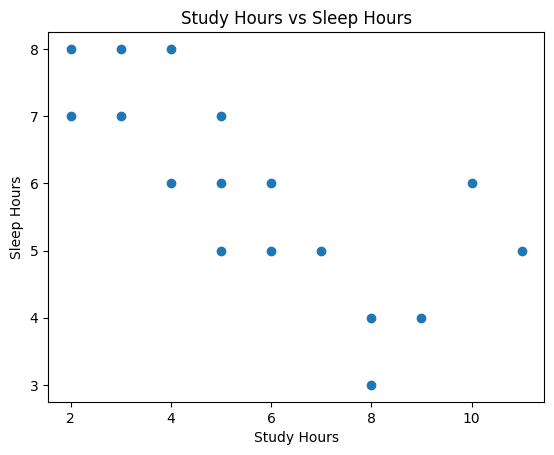

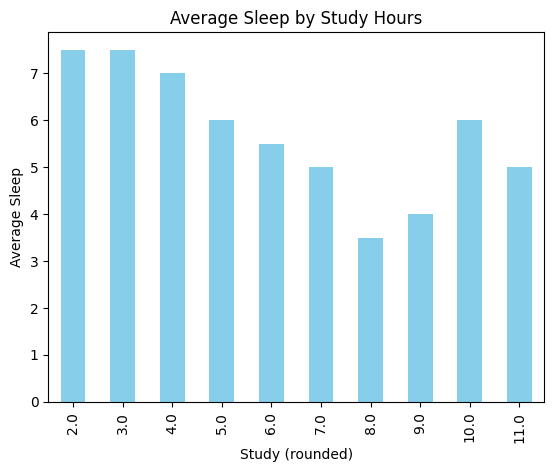

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("study_sleep_basic.csv")

# 2. BEFORE PREPROCESSING
print("\n--- Before Preprocessing ---")
print("Total records:", len(df))
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# 3. BASIC PREPROCESSING
# Remove missing values and duplicates
df = df.dropna(subset=["study_hours", "sleep_hours"]).drop_duplicates()

# 4. Remove inconsistent values (negative or unrealistic)
df = df[(df["study_hours"] >= 0) & (df["study_hours"] <= 12)]
df = df[(df["sleep_hours"] >= 0) & (df["sleep_hours"] <= 14)]

# 5. AFTER PREPROCESSING
print("\n--- After Preprocessing ---")
print("Total records:", len(df))
print("\nSummary Statistics:\n", df[["study_hours", "sleep_hours"]].describe())
print("\nCorrelation:", round(df["study_hours"].corr(df["sleep_hours"]), 2))

# 6.VISUALIZATIONS
plt.scatter(df["study_hours"], df["sleep_hours"])
plt.title("Study Hours vs Sleep Hours")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.show()

df.groupby(df["study_hours"].round())["sleep_hours"].mean().plot(kind="bar",
color="skyblue")
plt.title("Average Sleep by Study Hours")
plt.xlabel("Study (rounded)")
plt.ylabel("Average Sleep")
plt.show()